Created by: Eduardo Medina

Non-Linear Classifications

Date: 23-02-2025

##6.- Recreating non_Linear Data

Artificial nn are larger combination of linear (straight) and non-linear functions wich are potentally able to find a pattern in data.

'cuda'

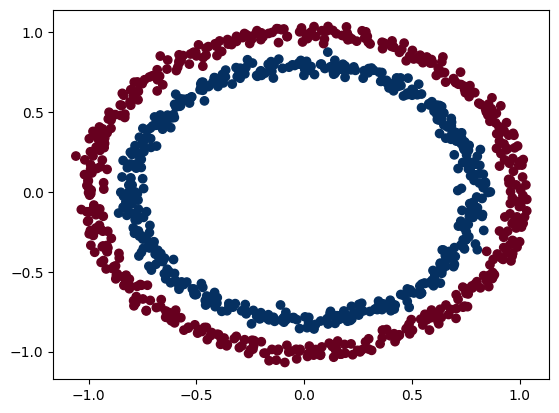

In [ ]:
#Make and plot data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch
from sklearn.model_selection import train_test_split
n_samples = 1000


X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
#Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

In [ ]:
#Convert data to tensors and then to train and test splits


#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                  random_state=42)



In [ ]:
X[:10], y[:10],X_train[:5],y_train[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]),
 tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2.- Building a model with non-linear function

In [ ]:
#Building a model (create a class) with non-linear activations
from torch import nn
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1  = nn.Linear(in_features=2,
                                 out_features=15)
    self.layer_2  = nn.Linear(in_features=15,
                                 out_features=10)
    self.layer_3  = nn.Linear(in_features=10,
                                 out_features=1)
    self.relu     = nn.ReLU()#Applies the rectified linear unit function elemnt-wise, Not a non-linear activation function
    self.sigmoid  = nn.Sigmoid() # f(x) = 1 / (1+exp(-x))

  def forward(self, x):
    #Where should we put our non-Linear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModel().to(device)
model_3



CircleModel(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [ ]:
#SetUp loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.12)

In [ ]:
#Calcuate accuracy - out of 100 example what percentage doues our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc


### 6.3.-Training a model with Non-Linear features

In [ ]:
#Random seeds
torch.manual_seed(25)
torch.cuda.manual_seed(25)

#Put all data on target devicde
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Loop through data
epochs = 1000

for epoch in range(epochs+1):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  #Logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits,y_train)#BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  #Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    acc_test = accuracy_fn(y_true = y_test,
                           y_pred=test_pred)

  #Print out what's happening
  if epoch % 100 == 0:
    print(f"\nEpoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {acc_test:.2f}%")



Epoch: 0 | Loss: 0.69355 | Acc: 49.50% | Test Loss: 0.69372 | Test Acc: 50.50%

Epoch: 100 | Loss: 0.69026 | Acc: 55.12% | Test Loss: 0.69212 | Test Acc: 51.00%

Epoch: 200 | Loss: 0.68829 | Acc: 56.12% | Test Loss: 0.69114 | Test Acc: 51.00%

Epoch: 300 | Loss: 0.68522 | Acc: 57.00% | Test Loss: 0.68950 | Test Acc: 53.00%

Epoch: 400 | Loss: 0.68041 | Acc: 58.88% | Test Loss: 0.68680 | Test Acc: 55.00%

Epoch: 500 | Loss: 0.67302 | Acc: 61.12% | Test Loss: 0.68209 | Test Acc: 54.00%

Epoch: 600 | Loss: 0.66115 | Acc: 64.38% | Test Loss: 0.67336 | Test Acc: 59.00%

Epoch: 700 | Loss: 0.64046 | Acc: 68.00% | Test Loss: 0.65612 | Test Acc: 64.50%

Epoch: 800 | Loss: 0.60307 | Acc: 77.75% | Test Loss: 0.62616 | Test Acc: 70.50%

Epoch: 900 | Loss: 0.53694 | Acc: 87.88% | Test Loss: 0.57004 | Test Acc: 81.00%

Epoch: 1000 | Loss: 0.43749 | Acc: 92.50% | Test Loss: 0.47870 | Test Acc: 88.00%


###Evaluating a model trained with non-linear activation functions

In [ ]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_pred[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [ ]:
# ->->->->->  Don't run all this more than once  <-<-<-<-<-
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary #If cannot import function -> Try restart session (Ctrl+M), that could help

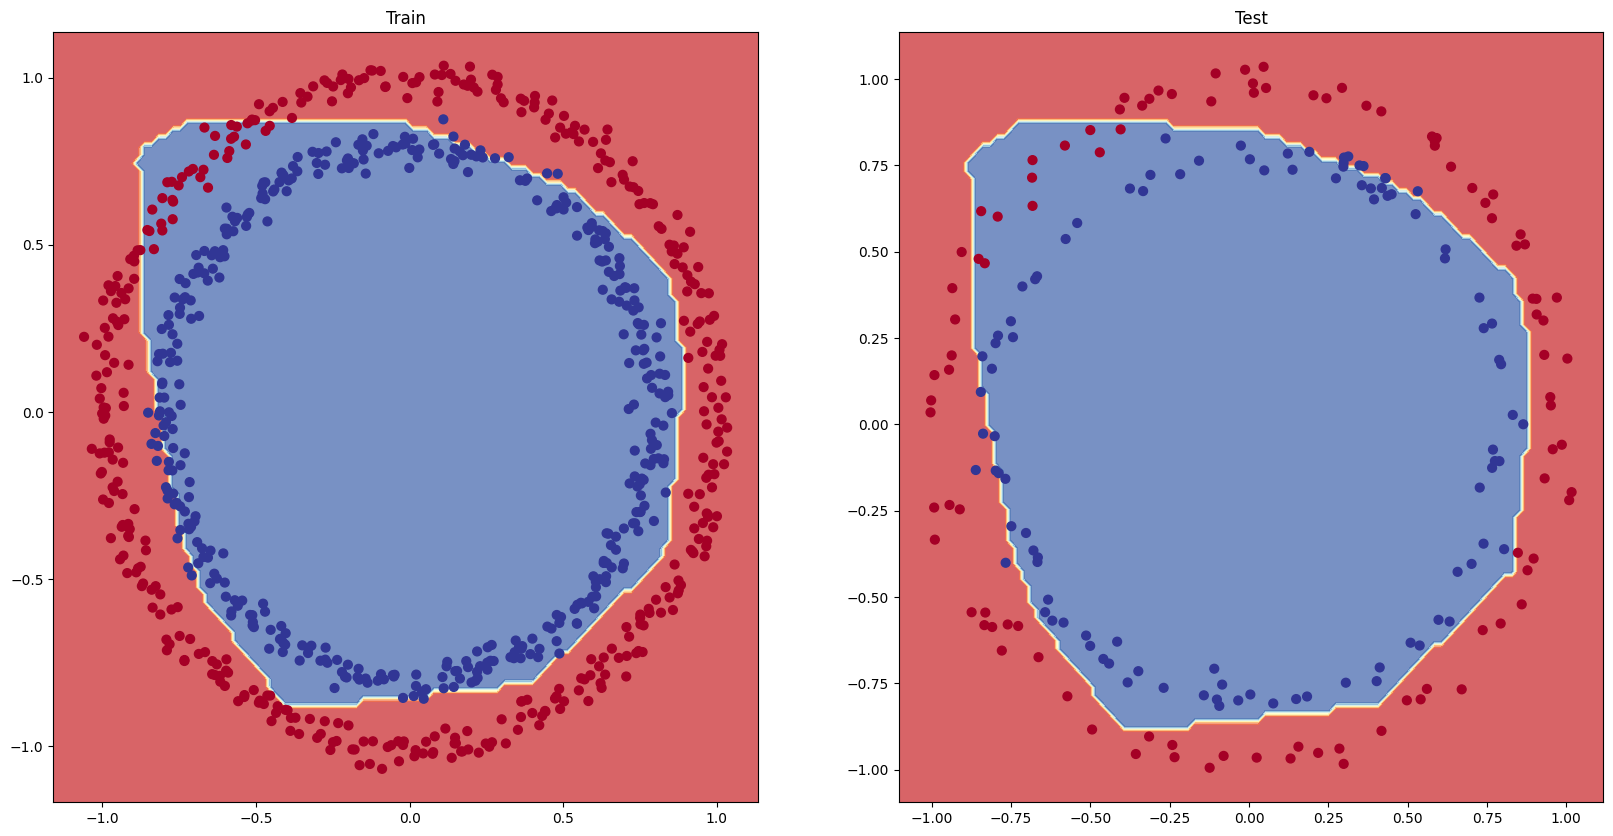

In [ ]:
#Plot decision boundaries
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7.- Replicating non_Linear activation function.

In [ ]:
#Create a tensor
A = torch.arange(-10,10,1,dtype = torch.float32);


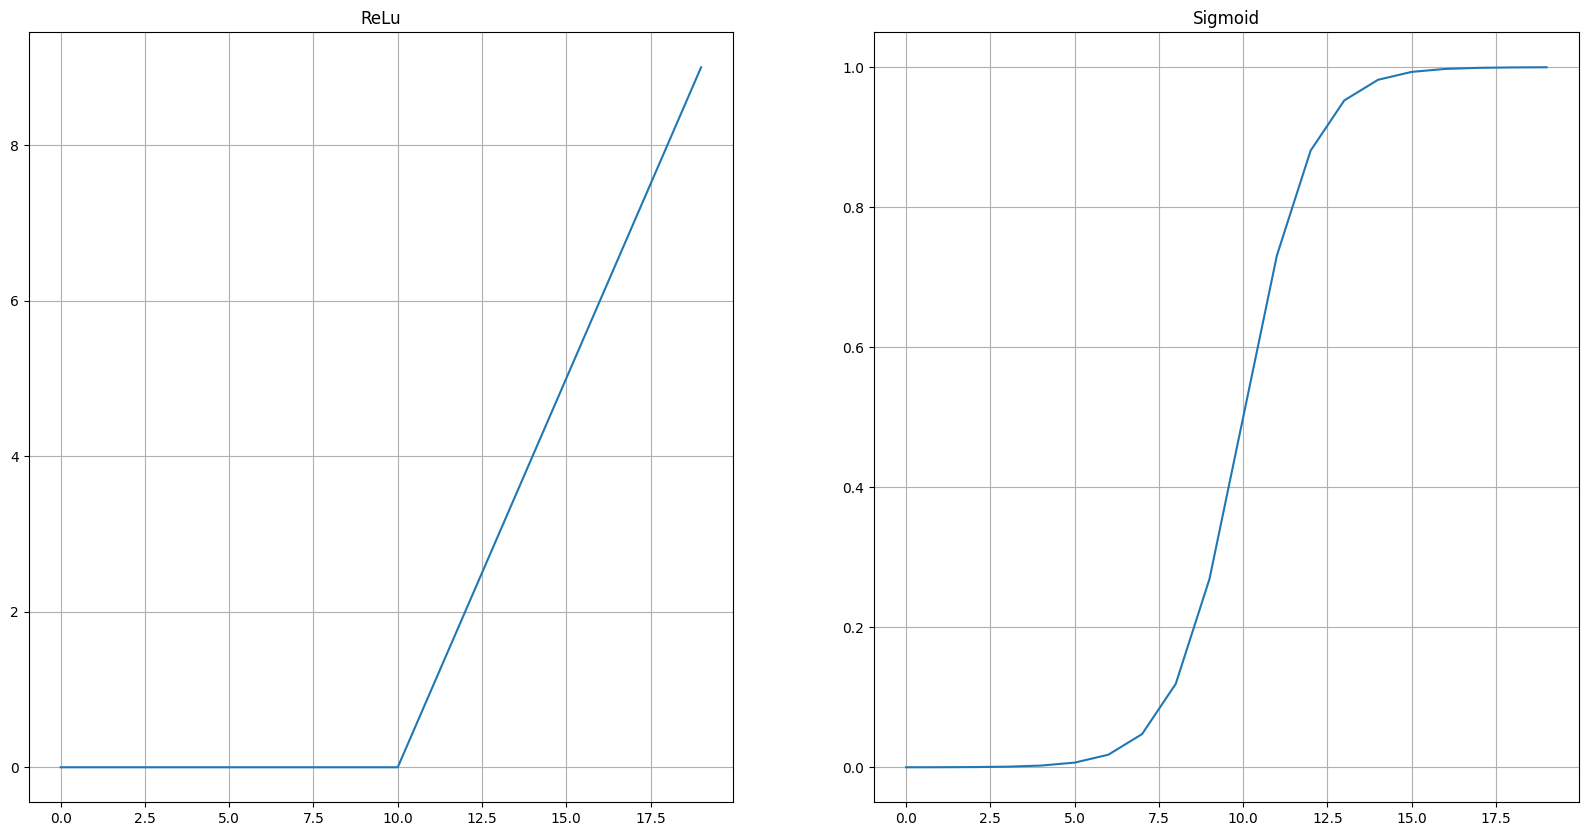

In [ ]:
def customizeReLu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)
def customizeSigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1/(1+torch.exp(-x))
customizeReLu(A),customizeSigmoid(A)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("ReLu")
plt.grid(True)
plt.plot(customizeReLu(A))
plt.subplot(1,2,2)
plt.title("Sigmoid")
plt.grid(True)
plt.plot(customizeSigmoid(A))

## 8.- Putting it all together with a multi-class classification problem
* Binary classificati = one thing or another.
* uUlti-class classificationnnn = more than one thing or another0.

### Creating a toy multi-class dataset

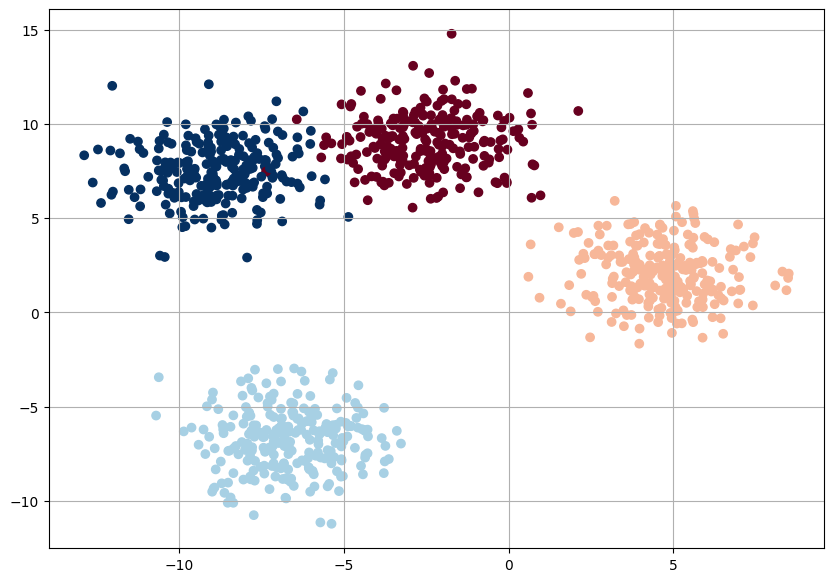

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

#Set the hyperparameters for data creation
NUM_CLASSES   = 4
NUM_FEATURES  = 2
RANDOM_SEED   = 42

#1.- Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2.- Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)       #Is the data
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)  #Is the labels

# 3.- SPLIT INTO TRAIN AND TEST
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

#Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdBu)
plt.grid(True)

### 8.2 Building a multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
#BUILD A MULTI CLASS CLASSIFICATION MODEL

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    ''' Initializes multi-class classification model

        Args:
          *input_features (int): Number of input features to the model
          *output_features (int): Number of output features of the model (number of
          output classes)
          *hidden_units (int): Number of hidden units between layers, default 8
    Example:
    '''
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    ) #A nn with 5 layers.

  def forward(self, x):
    return self.linear_layer_stack(x)

#Create an instance of BlobModel and send it to the target device.

model_4 = BlobModel(input_features=2, #X,Y
                    output_features=4, #Due to we have 4 different classes
                    hidden_units=8
                    ).to(device)
model_4




BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Create a loss function and optimizer for a multi-class classification model

In [ ]:
#Create a loss function for multi-classs classification
loss_fn = nn.CrossEntropyLoss()

#Create an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) #lr is a hyperparameter

### 8.4 Building a training Loop, getting prediciton probabilities for a multi-class PyTorch modules

In order to evaluate and train and test our model, we need to convert our model outputs to prediction probabilities and then to prediction labels

Logits (raw output of the model) --> Pred_probs (use`torch.softmax`) --> Pred labels (take the argmax of the prediction probabilities)

In [ ]:
#Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
#COnvert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) #Densiti of probabilities
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
for i in range(len(y_pred_probs[:10])):
  print(y_pred_probs[i], torch.sum(y_pred_probs[i]))

tensor([0.3169, 0.3244, 0.1405, 0.2182], device='cuda:0') tensor(1., device='cuda:0')
tensor([0.3336, 0.1432, 0.2026, 0.3206], device='cuda:0') tensor(1.0000, device='cuda:0')
tensor([0.3011, 0.1843, 0.2823, 0.2323], device='cuda:0') tensor(1., device='cuda:0')
tensor([0.3078, 0.2766, 0.1836, 0.2320], device='cuda:0') tensor(1., device='cuda:0')
tensor([0.3719, 0.1286, 0.1532, 0.3463], device='cuda:0') tensor(1., device='cuda:0')
tensor([0.3381, 0.1358, 0.1929, 0.3331], device='cuda:0') tensor(1., device='cuda:0')
tensor([0.2867, 0.1841, 0.2861, 0.2431], device='cuda:0') tensor(1.0000, device='cuda:0')
tensor([0.3554, 0.1355, 0.1740, 0.3351], device='cuda:0') tensor(1.0000, device='cuda:0')
tensor([0.3009, 0.1841, 0.2779, 0.2371], device='cuda:0') tensor(1., device='cuda:0')
tensor([0.3595, 0.1350, 0.1695, 0.3360], device='cuda:0') tensor(1., device='cuda:0')


In [ ]:
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred,y_blob_test

(tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 

### 8.5 .- Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
# Fit the multi-class model to de data
torch.manual_seed(42)
torch.cuda.manual_seed(42)


#Set number of epochs
epochs = 100


#Put the data to de target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


#Loop through data
for epoch in range(epochs+1):
  ###Training
  model_4.train()

  #1. Forward pass
  y_logits = model_4(X_blob_train).squeeze()  #--------
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  #2. Calculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  #Optimizer
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)#.squeeze() #--------
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                          y_pred=test_pred)

  #Print out what's happening
  if epoch % 10 == 0:
    print(f"\nEpoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")





Epoch: 0 | Loss: 1.06362 | Acc: 54.62% | Test Loss: 1.00386 | Test Acc: 55.00%

Epoch: 10 | Loss: 0.62096 | Acc: 97.25% | Test Loss: 0.63668 | Test Acc: 98.00%

Epoch: 20 | Loss: 0.40612 | Acc: 98.75% | Test Loss: 0.41038 | Test Acc: 100.00%

Epoch: 30 | Loss: 0.23616 | Acc: 99.12% | Test Loss: 0.22684 | Test Acc: 99.50%

Epoch: 40 | Loss: 0.10442 | Acc: 99.25% | Test Loss: 0.09487 | Test Acc: 99.50%

Epoch: 50 | Loss: 0.06402 | Acc: 99.25% | Test Loss: 0.05627 | Test Acc: 99.50%

Epoch: 60 | Loss: 0.04968 | Acc: 99.25% | Test Loss: 0.04191 | Test Acc: 99.50%

Epoch: 70 | Loss: 0.04243 | Acc: 99.25% | Test Loss: 0.03429 | Test Acc: 99.50%

Epoch: 80 | Loss: 0.03799 | Acc: 99.25% | Test Loss: 0.02949 | Test Acc: 99.50%

Epoch: 90 | Loss: 0.03501 | Acc: 99.25% | Test Loss: 0.02637 | Test Acc: 99.50%

Epoch: 100 | Loss: 0.03295 | Acc: 99.25% | Test Loss: 0.02413 | Test Acc: 99.50%


### 8.6 Making a evaluate and evaluating predictions with a PyTorch multi-class model

In [ ]:
#Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test).squeeze()

#View the first 10 predictions
y_logits[:10]

tensor([[-0.6265,  6.0263, -7.6651, -8.4859],
        [-2.1884, -6.4025, -3.7404,  3.1544],
        [-3.4378, -3.9215,  3.1833, -2.6303],
        [-1.1572,  4.2257, -3.8657, -4.9030],
        [ 3.7878, -1.3366, -9.1821, -6.9863],
        [-2.8353, -7.6102, -4.3199,  3.8288],
        [-3.0547, -3.3553,  2.8184, -2.1533],
        [ 3.4042, -4.0514, -6.9310, -3.5718],
        [-4.3962, -5.0225,  3.8457, -3.4044],
        [ 3.5306, -3.0359, -7.5747, -4.7342]], device='cuda:0')

In [ ]:
#Go for logits --> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10],torch.argmax(y_pred_probs[:10], dim=1)

(tensor([[1.2887e-03, 9.9871e-01, 1.1306e-06, 4.9757e-07],
         [4.7544e-03, 7.0295e-05, 1.0071e-03, 9.9417e-01],
         [1.3252e-03, 8.1698e-04, 9.9489e-01, 2.9716e-03],
         [4.5713e-03, 9.9502e-01, 3.0462e-04, 1.0796e-04],
         [9.9406e-01, 5.9140e-03, 2.3154e-06, 2.0810e-05],
         [1.2739e-03, 1.0750e-05, 2.8866e-04, 9.9843e-01],
         [2.7813e-03, 2.0591e-03, 9.8831e-01, 6.8500e-03],
         [9.9846e-01, 5.7729e-04, 3.2419e-05, 9.3264e-04],
         [2.6309e-04, 1.4063e-04, 9.9889e-01, 7.0933e-04],
         [9.9832e-01, 1.4043e-03, 1.5007e-05, 2.5699e-04]], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

In [ ]:
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred,y_blob_test

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
         1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
         2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
         2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
         2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
         1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 

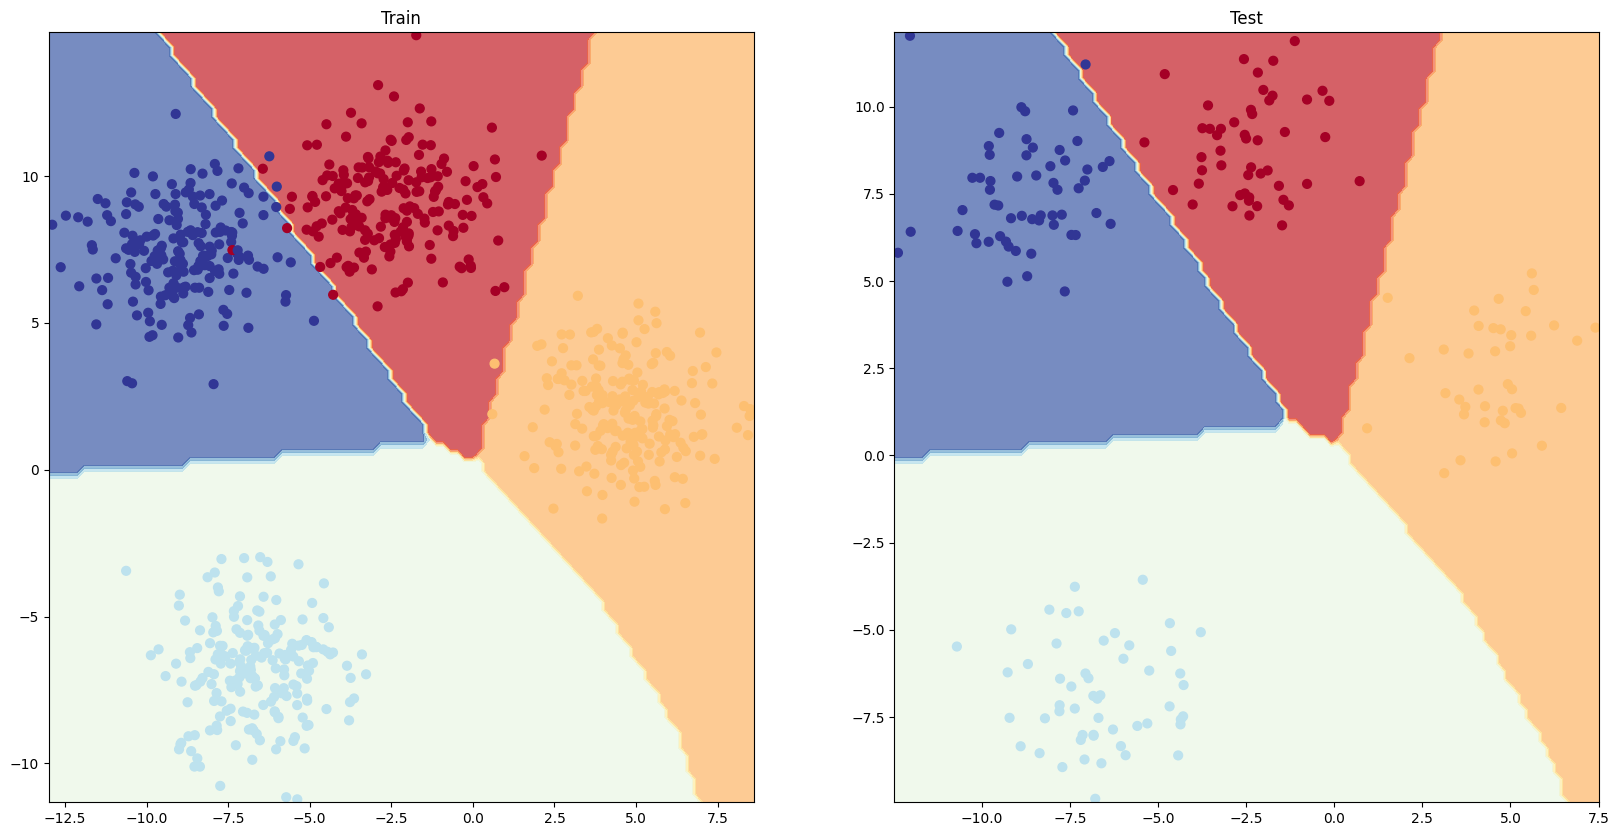

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
